# Initial Steps 
- Import Libraries and Modules
- Define Folder Paths
- Load and Preprocess Images

In [30]:
import os
import shutil
import random

# Define the paths to your image folders
folder_paths = [
    r'S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight',  
    r'S:\Projects\Capstone Projects\RiceLeaf\Brown spot',
    r'S:\Projects\Capstone Projects\RiceLeaf\Leaf smut'
]

# Define the root directory where you want to create train, validation, and test directories
root_dir = r'S:\Projects\Capstone Projects\RiceLeaf'  # Update with your desired root directory

# Define the percentages for train, validation, and test splits
train_split = 0.6  # 60% of data for training
val_split = 0.2    # 20% of data for validation
test_split = 0.2   # 20% of data for testing

# Create train, validation, and test directories
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')
test_dir = os.path.join(root_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define classes
classes = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']  # Update with your class names

# Function to split images into train, validation, and test sets
def split_images(src_folder, dst_train, dst_val, dst_test):
    # Get the list of image files in the source folder
    class_files = [f for f in os.listdir(src_folder) if f.endswith('.jpg')]
    random.shuffle(class_files)
    
    # Calculate the number of images for each split
    num_total = len(class_files)
    num_train = int(num_total * train_split)
    num_val = int(num_total * val_split)
    
    # Move images to train directory
    for img_file in class_files[:num_train]:
        src = os.path.join(src_folder, img_file)
        dst = os.path.join(dst_train, img_file)
        shutil.copyfile(src, dst)
    
    # Move images to validation directory
    for img_file in class_files[num_train:num_train + num_val]:
        src = os.path.join(src_folder, img_file)
        dst = os.path.join(dst_val, img_file)
        shutil.copyfile(src, dst)
    
    # Move images to test directory
    for img_file in class_files[num_train + num_val:]:
        src = os.path.join(src_folder, img_file)
        dst = os.path.join(dst_test, img_file)
        shutil.copyfile(src, dst)

# Iterate over each class folder
for class_name, src_folder in zip(classes, folder_paths):
    # Create subdirectories in train, validation, and test directories for each class
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # Split images into train, validation, and test sets
    split_images(src_folder, os.path.join(train_dir, class_name),
                 os.path.join(val_dir, class_name), os.path.join(test_dir, class_name))

# After running this code, you will have your images split into train, validation, and test directories.


# Model Preprocessing , building and training

Found 29 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4483 - loss: 1.0571 - val_accuracy: 0.4444 - val_loss: 3.7471
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4483 - loss: 3.9087 - val_accuracy: 0.4444 - val_loss: 4.4350
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4483 - loss: 5.2217 - val_accuracy: 0.4444 - val_loss: 2.2166
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4483 - loss: 2.5516 - val_accuracy: 0.4444 - val_loss: 1.0309
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4483 - loss: 1.0725 - val_accuracy: 0.4444 - val_loss: 1.0562
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4483 - loss: 1.0046 - val_accuracy: 0.5556 - val_loss: 0.9395
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5862 - loss: 0.9171 - val_accuracy: 0.4444 - val_loss: 1.1008
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4483 - loss: 1.1906 - val_accuracy: 0.5556 - val_loss: 0.8862
Epoch 9/40
1/1 ━

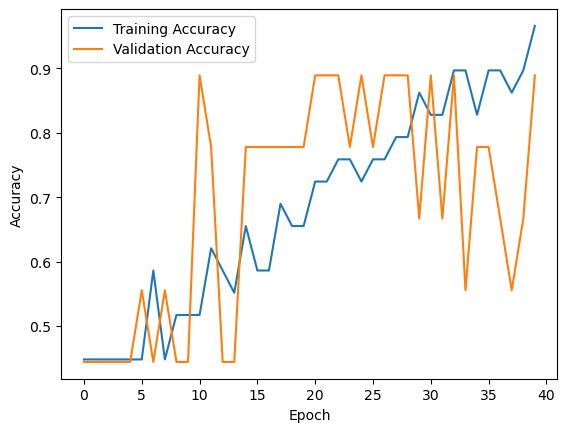

In [34]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the paths to your dataset
train_dir = r'S:\Projects\Capstone Projects\RiceLeaf\train'  # Update with your actual train directory path
val_dir = r'S:\Projects\Capstone Projects\RiceLeaf\val'      # Update with your actual validation directory path
test_dir = r'S:\Projects\Capstone Projects\RiceLeaf\test'    # Update with your actual test directory path

# Set the image size and batch size
image_size = (224, 224)
batch_size = 32

# Data augmentation and normalization for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    horizontal_flip=True)

# Load the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])  # Assuming 3 classes

# Normalization for validation and testing datasets (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the validation dataset
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size= 32,
    class_mode='categorical',
    classes=['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])

# Load the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=64,
    class_mode='categorical',
    classes=['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])

# Define the CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 4 classes
])

# Define a custom learning rate
custom_lr = 0.001

# Create optimizer with custom learning rate
optimizer = Adam(learning_rate=custom_lr)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(train_generator)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## getting training accuracy: 0.96 and testing accuracy: 0.78

## model save in h5 format

In [35]:
model.save("S:\Projects\Capstone Projects\RiceLeaf\model.h5")

# prediction:

In [54]:


import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('S:\Projects\Capstone Projects\RiceLeaf\model.h5')  # Update with your model's file path

# Define the image path you want to predict
image_path = 'S:\Projects\Capstone Projects\RiceLeaf\Brown spot\DSC_0106.jpg'  # Update with your image file path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the image
 
# Make predictions
predictions = model.predict(img_array)

# Assuming you have 3 classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
predicted_class = class_names[np.argmax(predictions)]

print(f'Predicted class: {predicted_class}')
print(f'Confidence: {np.max(predictions) * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicted class: Brown spot
Confidence: 99.70%


# Below is an image path from local storage, and model predication is written as well.

### image path and model predictions

S:\Projects\Capstone Projects\RiceLeaf\Brown spot\DSC_0106.jpg : Brown spot

S:\Projects\Capstone Projects\RiceLeaf\Leaf smut\DSC_0317.JPG : Leaf smut

S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight\DSC_0381.JPG  :  Leaf smut 

S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight\DSC_0406.JPG :  Brown spot

S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight\DSC_0703.JPG  : Leaf smut

S:\Projects\Capstone Projects\RiceLeaf\Bacterial leaf blight\DSC_0366.jpg  : Bacterial leaf blight
